In [ ]:
# these are the packages used:
import pandas as pd
from bs4 import BeautifulSoup
import requests
#this is the main url:
books_url = 'https://books.toscrape.com/'
# i made this variable so that i can iterate through the correct url, since the website doesn't always use the exact name of the book in its url.
urls = []
# this list should contain the data frame at the end:
categories = []
# this loop goes through all pages and get all books in each page:
for i in range(1, 51):
    books_url += f'catalogue/page-{i}.html'
    response = requests.get(books_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')
# after getting the books, this loop will scrape all data for each book and store them in variables to then
# append them in the dictionary in the main list.
    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        stock = book.find('p', class_='instock availability').text.strip()
        rating = book.p['class'][1]
        # this is where i get the full url to store it in the urls list along the way of scraping the data:
        relative_url = book.h3.a['href']
        full_url = f"https://books.toscrape.com/catalogue/{relative_url}"
        urls.append(full_url)
        # add the scraped data to the main dictionary, which will turn into the data frame later:
        categories.append({
            'title': title,
            'price': price,
            'stock': stock,
            'rating': rating
        })
    # this resets the link so that the loop doesn't mix links and mess up the process:
    books_url = 'https://books.toscrape.com/'
    

In [ ]:
# here is where i made the data frame:
categories_df = pd.DataFrame(categories)
# these lines are just to correct the data types for visualization later:
categories_df['price'] = categories_df['price'].str[2:]
categories_df['price'] = categories_df['price'].astype('float')
categories_df['rating'] = categories_df['rating'].astype('category')
categories_df.dtypes

title       object
price      float64
stock       object
rating    category
dtype: object

In [ ]:
# i thought maybe making the rating column ordered based on the number of stars will be great for visualization:
categories_df['rating'] = pd.Categorical(categories_df['rating'], categories=["One", "Two", "Three", "Four", "Five"], ordered=True)
categories_df

,title,price,stock,rating
0,A Light in the Attic,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,Four
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,Five
998,1st to Die (Women's Murder Club #1),53.98,In stock,One


this is where i benefited from storing the urls. i wanted to enter each book to get its description, but the problem is that the url sometimes
is different from the name. e.g. (name is A Light in the Attic, but the name in url is: a-light-in-the-attic) i tried to fix
them using str, but there are other books having multiple special characters, making the whole process tedious. storing the url while scraping the data is much easier.


In [ ]:
description_data = []
# this loop iterate through the urls variable from earlier to get each page that contains each book's details:
for url in urls:
    response = requests.get(url)
    # this if statement verifies the url leads somewhere, it prevents the program from shutting down just from a url not working. all urls work.
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # this line got me the description, i'm not trying another code because this cell takes 11 MINUTES TO RUN.
        description = soup.find('meta', {'name': 'description'})
        if description:
            description_data.append(description['content'].strip())
        else:
            print(f"Description not found for URL: {url}")
    else:
        print(f"Failed to fetch URL: {url} (Status Code: {response.status_code})")

In [ ]:
# after scraping the descriptions, we finally turn it into a series and then add it to the data frame:
categories_df['descriptions'] = pd.Series(description_data)

In [ ]:
# the final data frame:
categories_df

,title,price,stock,rating,descriptions
0,A Light in the Attic,51.77,In stock,Three,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,53.74,In stock,One,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.10,In stock,One,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.82,In stock,Four,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,From a renowned historian comes a groundbreaki...
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,One,
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,Four,High school student Kei Nagai is struck dead i...
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,Five,"In Englandâs Regency era, manners and elegan..."
998,1st to Die (Women's Murder Club #1),53.98,In stock,One,"James Patterson, bestselling author of the Ale..."


In [ ]:
# this is to save it into a csv file for task submission:
categories_df.to_csv('Scraped_data.csv')

# Visualization

<Axes: xlabel='rating', ylabel='price'>

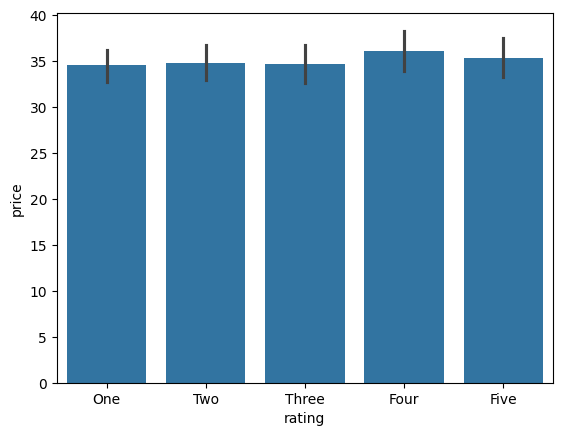

In [ ]:
import seaborn as sns

sns.barplot(x = categories_df['rating'], y = categories_df['price'])

<Axes: ylabel='price'>

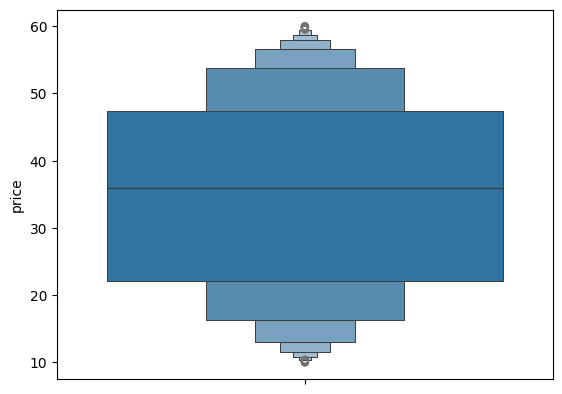

In [73]:
sns.boxenplot(categories_df['price'])

<Axes: xlabel='count', ylabel='rating'>

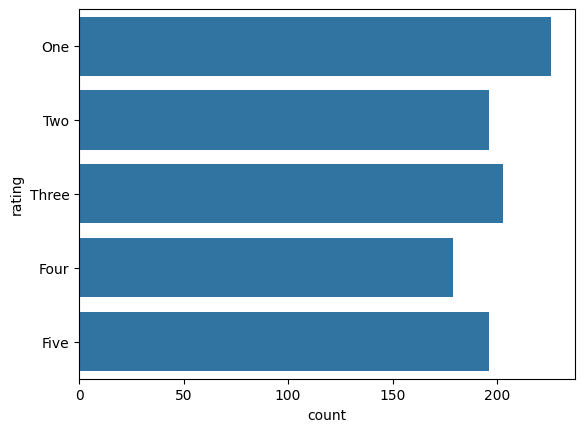

In [75]:
sns.countplot(categories_df['rating'])